### 混合モデル

研究対象の過程や現象が、例えば正規分布や2項分布、あるいは他の何らか正準分布(canonical distribution)のような単一の分布では適切に記述できない物の、これらの分布を組み合わせることで記述できることがあります。分布の混合からデータが発生していると仮定するモデルは、混合モデル(mixture model)と呼ばれます。正規分布の混合するモデルは**混合ガウス分布(Gaussain mixture model)**と知られています。各要素はそれぞれ異なる平均と異なる標準偏差を持った正規分布になります。事実、どれほど複雑であっても、どれほど奇妙であっても、正規分布を適切に組み合わせることによってい、私たちが望む任意の分布を近似できるのです。


#### 混合モデルの構築方法
有限の混合モデルを構築する際の一般的なイメージは、それぞれが何らかの分布で表現された、ある個数の部分母集団があり、どの分布かはわからないけれど、それらの分布に従うデータ点がある、という状況です。従って、各データ点を適切に部分母集団に割り当てる必要があるのです。これは、階層モデルを作ることによって行えます。モデルのトップレベルには、しばしば**潜在変数(latent variable)**と呼ばれる、実際には観測されない確率変数があります。潜在変数の役割は、要素となるどの分布が特定の観測値に対応するかを規定すること、すなわち、与えられた一つのデータ点を、どの要素分布を使ってモデル化するかを規定するのです。$z$を使って潜在変数を示すことが文献で多く見られます。


In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)

Text(0.5, 0, '$x$')

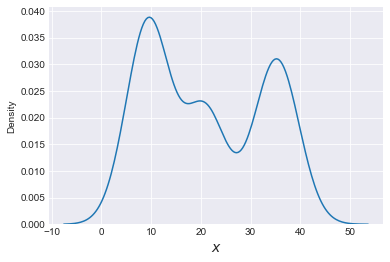

In [4]:
clusters = 3
n_cluster = [90, 50, 75]
n_total = sum(n_cluster)
means = [9, 21, 35]
std_devs = [2, 2, 2]

mix = np.random.normal(np.repeat(means, n_cluster), np.repeat(std_devs, n_cluster))
sns.kdeplot(np.array(mix))
plt.xlabel('$x$', fontsize=14)

#### ディリクレ分布(Dirichlet distribution)
ベルヌーイ分布を$k$次元に一般化したのはカテゴリカル分布で、ベータ分布を一般化したものはディリクレ分布となります。

In [5]:
with pm.Model() as model_kg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    category = pm.Categorical('category', p=p, shape=n_total)
    
    means = pm.math.constant([10, 20, 35])
    y = pm.Normal('y', mu=means[category], sd=2, observed=mix)
    trace_kg = pm.sample(10000)
    
chain_kg = trace_kg[1000:]
varname_kg = ['p']
pm.traceplot(chain_kg, varname_kg)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p]
>CategoricalGibbsMetropolis: [category]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 220 seconds.
The number of effective samples is smaller than 25% for some parameters.


AttributeError: 'TransformedRV' object has no attribute 'traceplot'

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

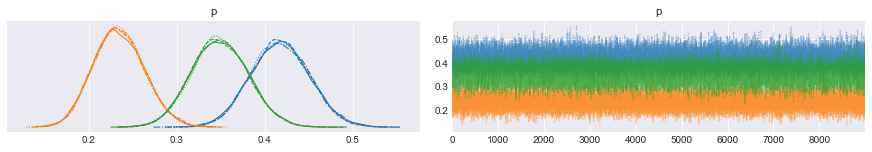

In [6]:
pm.traceplot(chain_kg, varname_kg)